In [3]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [1]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['station', 'measurement']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)

# Exploratory Precipitation Analysis

In [9]:
# Find the most recent date in the data set.
mr_date= session.query(func.max(Measurement.date)).first()
print(mr_date)

('2017-08-23',)


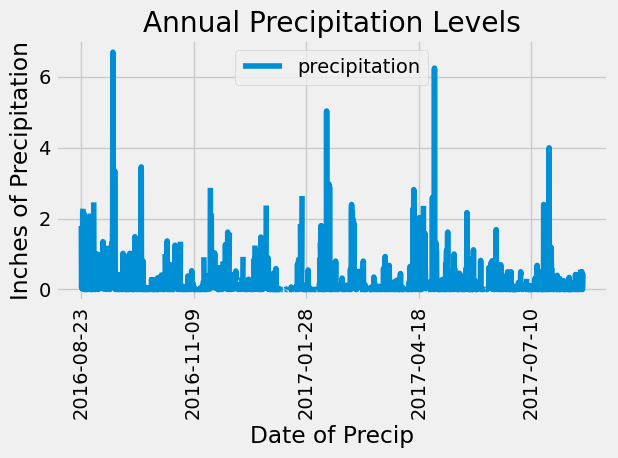

In [52]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

# Calculate the date one year from the last date in data set.
start_date=dt.date(2017,8,23)-dt.timedelta(days=365)

#Perform a query to retrieve the data and precipitation scores
data_12=session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>=start_date).all()

# Save the query results as a Pandas DataFrame. Explicitly set the column names
year_df= pd.DataFrame(data_12, columns=["date", "precipitation",])

# Sort the dataframe by date
year_df=year_df.sort_values(by="date")

# Use Pandas Plotting with Matplotlib to plot the data
year_df.plot(x="date", y="precipitation",rot=90)
plt.title("Annual Precipitation Levels")  
plt.xlabel("Date of Precip")
plt.ylabel("Inches of Precipitation")
plt.tight_layout()
plt.show()




In [53]:
# Use Pandas to calculate the summary statistics for the precipitation data
year_df.describe()

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [54]:
# Design a query to calculate the total number of stations in the dataset
session.query(func.count(Station.station)).all()

[(9,)]

In [10]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
active_stations= session.query(Measurement.station,func.count(Measurement.station).label('station_count')).group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()

active_stations

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [66]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
active_stats= (session.query(
        func.min(Measurement.tobs).label('min_temp'),
        func.max(Measurement.tobs).label('max_temp'),
        func.avg(Measurement.tobs).label('avg_temp'))
        .filter(Measurement.station=='USC00519281').all())

print(active_stats)

[(54.0, 85.0, 71.66378066378067)]


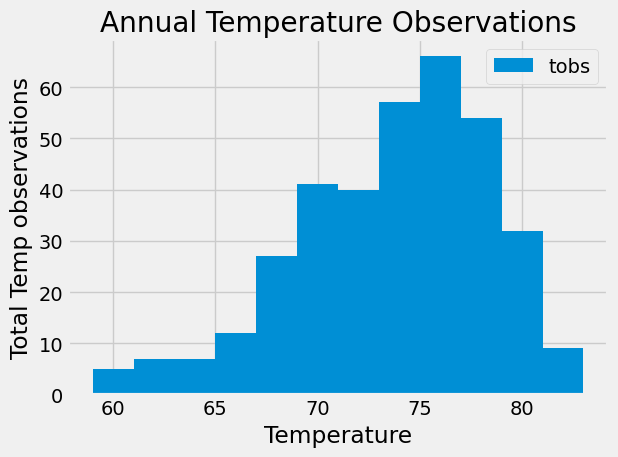

In [76]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
mr_date_station= session.query(func.max(Measurement.date)).filter(Measurement.station == "USC00519281").first()
#print(mr_date_station)

start_date_station = dt.date(2017,8,18) - dt.timedelta(days=365)

annual_station = session.query(Measurement.tobs).filter(Measurement.station == "USC00519281"). filter(Measurement.date >= start_date_station).all()

annual_station_df= pd.DataFrame(annual_station, columns=['tobs'])
#annual_station

annual_station_df.plot.hist(bins=12)
plt.title("Annual Temperature Observations")  
plt.xlabel("Temperature")
plt.ylabel("Total Temp observations")
plt.tight_layout()
plt.show()


# Close Session

In [42]:
# Close Session
session.close()